# Basic Time series analysis
### <a id='1234'>Contents</a>
- <a href='#0'>Libraries</a>
- <a href='#1'>1. Data</a>
    - <a href='#1.1'>1.1. Data overview</a>
- <a href='#2'>2. Data Manipulation</a>
- <a href='#3'>3. Exploratory Data Analysis</a>
- <a href='#4'>4. Data preprocessing</a>
- <a href='#5'>5. Analysis and Results</a>
## <a id='0'>Libraries</a>
<div style="text-align: right"><a href='#1234'>Table of Contents</a></div>

In [1]:
import operator
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels import api as sm

%matplotlib inline

## <a id='1'>1.Data</a>
<div style="text-align: right"><a href='#1234'>Table of Contents</a></div>

In [2]:
df = pd.read_excel('../data/data.xlsx')

### <a id='1.1'>1.1. Data overview</a>
<div style="text-align: right"><a href='#1234'>Table of Contents</a></div>

In [3]:
df.head()

,index,value
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [4]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  1500
Columns  :  2

Features : 
 ['index', 'value']

Missing values :   0

Unique values :  
 index    1500
value     585
dtype: int64


Out of 1500 rows 585 entries are unique for value column. Now, let's print top 10 most frequent values.

In [5]:
df['value'].value_counts()[:10]

0         468
11985       8
12495       7
12240       6
179520      6
182325      6
176970      6
176715      6
2295        6
9435        5
Name: value, dtype: int64

We can observe that around one third of values are zeros. There are also many high values but with less frequencies. Let's see some of the common statistical values.

In [6]:
print('Minimum:', df['value'].min())
print('Maximum:', df['value'].max())
print('Mean: ', df['value'].mean())
print('Median: ', df['value'].median())
print('Mode: ', df['value'].mode())

Minimum: 0
Maximum: 297075
Mean:  88337.27
Median:  83385.0
Mode:  0    0
dtype: int64


We can see that values ranges from 0 to 297k with mean and median are around 88k and 83k respectively. As we have seen before the most frequent value(mode) is zero.

## <a id='2'>2. Data Manipulation</a>
<div style="text-align: right"><a href='#1234'>Table of Contents</a></div>

We only need value column as it contais the signal

In [7]:
df = df[['value']]

## <a id='3'>3. Exploratory Data Analysis</a>
<div style="text-align: right"><a href='#1234'>Table of Contents</a></div>


Let's see how signal look !

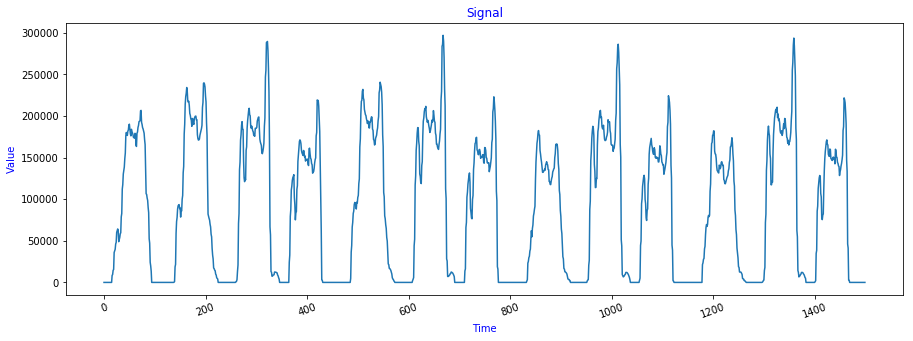

In [8]:
fig = plt.figure(figsize=(15,5))
plt.plot(df['value'], '-', label='value', markersize=1.0)
plt.xlabel("Time", color='blue')
plt.ylabel("Value", color='blue')
plt.xticks(rotation=20)
matplotlib.rc('axes.formatter', useoffset=False)
plt.title("Signal", color='blue')
plt.show()

We can see some repeating structures in the data. We need to do further analysis to get more details(see next section)

To have a more clear understanding of data let's create dot plot.

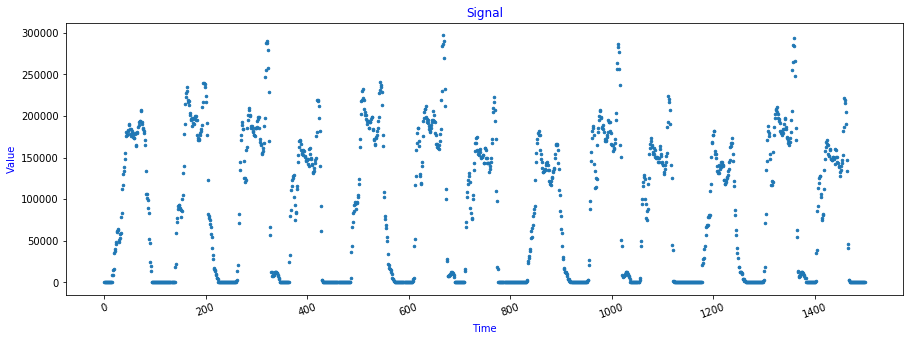

In [9]:
fig = plt.figure(figsize=(15,5))
plt.plot(df['value'], '.', label='value', markersize=5.0)
plt.xlabel("Time", color='blue')
plt.ylabel("Value", color='blue')
plt.xticks(rotation=20)
matplotlib.rc('axes.formatter', useoffset=False)
plt.title("Signal", color='blue')
plt.show()

We can see that there are more observations close to zero(which we have found before). Also we can see some dense regions near the value range of 150k-200k. We can also observe some high values(around 250k-300k) with an approximate interval of 300-400 timesteps.

Let's see the distribution of values now

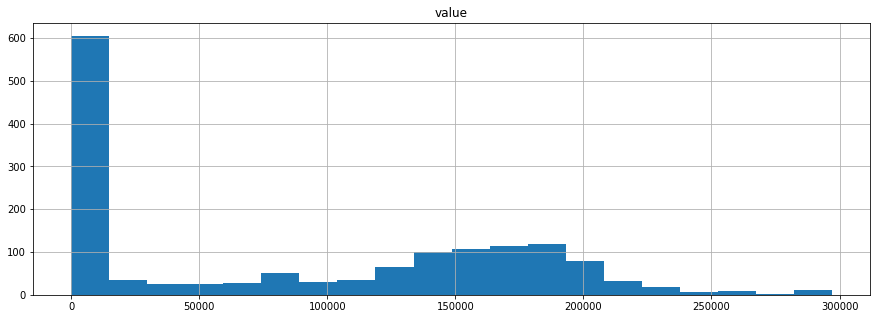

In [10]:
hist = df.hist(bins=20, figsize=(15, 5))

We can see that there are high frequencies for low values. There are a considerable number of values having frequencies in the aproximate approximate frequency range of 20-100. Can also observe few high values. 

Let's create density plot to have a better idea of shape of the distribution

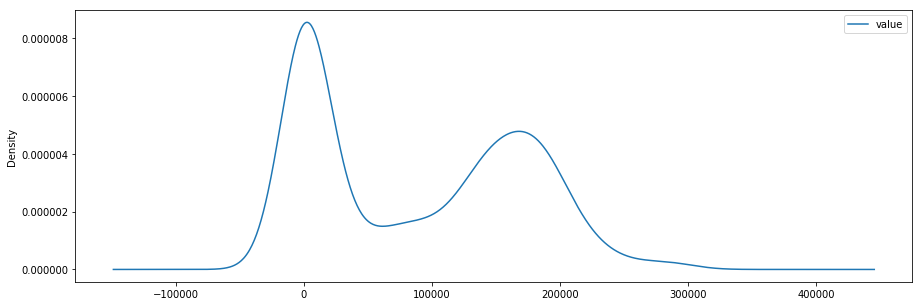

In [11]:
df.plot(kind='kde', figsize=(15, 5))

We can clearly see the high concentration of values around 0 and in the range of 150k-200k.

Let's see how the value distributed across different time intervals using Box and Whisker plots.

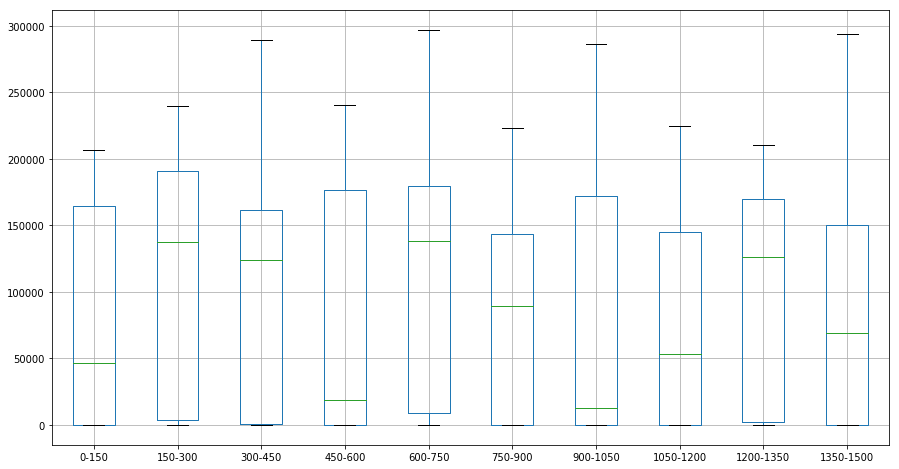

In [12]:
time_groups = pd.DataFrame()
interval = 150
for i in range(0, len(df), interval):
  key = "%s-%s"%(i, i+interval)
  time_groups[key] = df['value'][i:i+interval].values
time_groups.boxplot(figsize=(15, 8))

We can see that 25th percentile close to zero in most of the intervals. Median values lies in an approximate interval of 20k-140k. 75th percentiles have an approximate range of 150k-200k. There are no outliers in any intervals.

We can also create heatmap to compare observations between intervals. Here we take more smaller intervals(50)

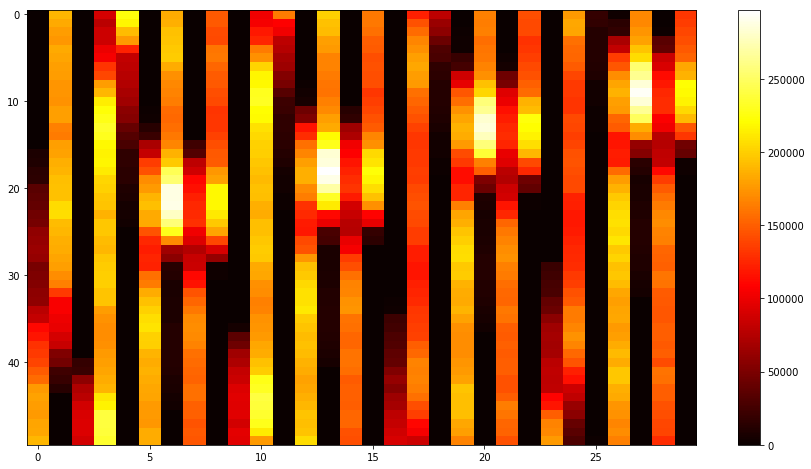

In [13]:
time_groups = pd.DataFrame()
interval = 50
for i in range(0, len(df), interval):
  key = "%s-%s"%(i, i+interval)
  time_groups[key] = df['value'][i:i+interval].values
  
fig, ax = plt.subplots(figsize=(15,8))
im = ax.imshow(time_groups, cmap=plt.get_cmap('hot'), interpolation=None, aspect='auto')
fig.colorbar(im)
plt.show()

We can see the concentration of different values(approximate) in each interval in each position and it's easy to compare among different intervals.

Let's explore the relationship between each observation and lag of that observation using scatter plot

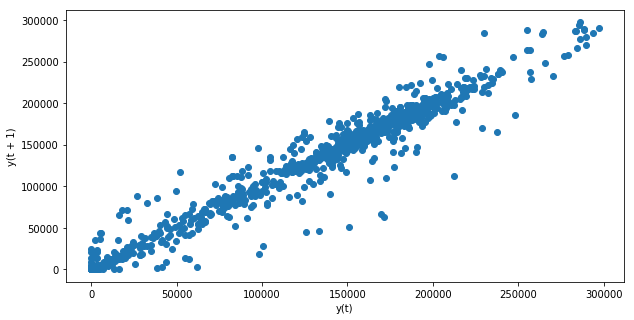

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
lag_plot(df['value'])
plt.show()

We can observe a positive correlation. There may be higher correlation for other lags. To find that we need to employ further analysis. 

## <a id='4'>4. Data preprocessing</a>
<div style="text-align: right"><a href='#1234'>Table of Contents</a></div>

First of let's convert the values to a numpy array

In [15]:
signal = df['value'].values

In [16]:
# normalizing the signal
norm_sig = signal - np.mean(signal)

## <a id='5'>5. Analysis and Results</a>
<div style="text-align: right"><a href='#1234'>Table of Contents</a></div>

One of the common methods to check if a signal is periodic is autocorrelation(Other mthods are zero crossing, Fourier transform etc)

In [17]:
# autocorrelation coefficient
acf = sm.tsa.acf(norm_sig, nlags=len(signal))

Text(0, 0.5, 'Autocorrelation')

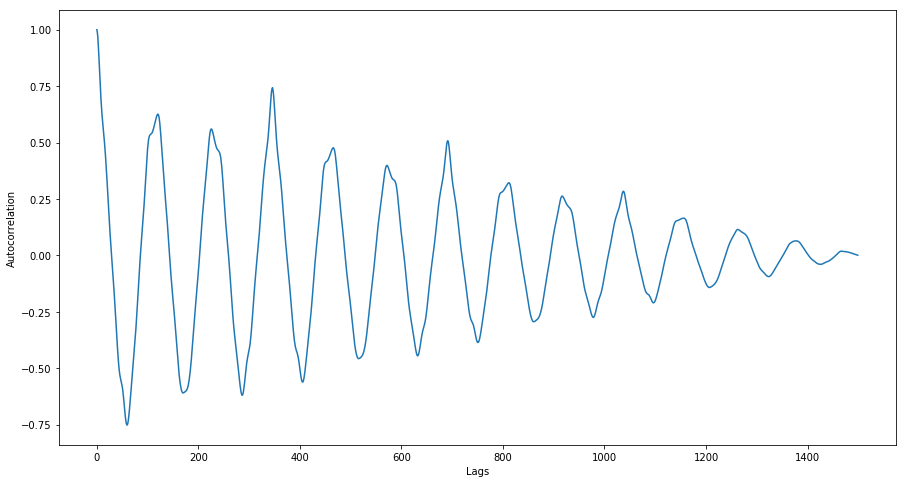

In [18]:
plt.figure(figsize = (15, 8))
lag = np.arange(len(norm_sig))
plt.plot(lag, acf)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

We can observe high autocorrelation around 350 time lags(not considering the higher autocoorrelation values for lowest time lags). When we closely look the signal, we can see the that signal is periodic with a period approximately equal to 350 time steps. To find the exact value for period let's look for the exact value of highest correlation in the range of 300 to 400 time steps.

In [19]:
sub_acf = acf[300:400]

In [20]:
index, value = max(enumerate(sub_acf), key=operator.itemgetter(1))

In [21]:
print(index, value)

46 0.7431348621692865


So, highest correlation is on time lag of 346(300 + 46). That means the singal is periodic with period of 346 time steps.